<a href="https://colab.research.google.com/github/Nicolaser1102/Gradient_Boosting_/blob/main/Ejercicio_Gradient_Boosting/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación:11/3/2022
## Fecha de actualización: 12/3/2022
## Esteban Simbaña

#Ejercicio de Potenciación del gradiente (Concurso de Kaggle)

Montamos nuestro drive

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos librerías 

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importamos el df de entrenamiento

In [112]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 3/Deberes /Week 2 - Track 3/spaceship-titanic.zip (Unzipped Files)/train.csv'
df = pd.read_csv(nombrearchivo)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Observamos la dimensión del df y los valores faltantes de las columnas 

In [113]:
df.shape

(8693, 14)

In [114]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Limpieza de datos 

##Limpieza de columna 'HomePlanet'
 
En este caso se analizarán los valores faltantes para considerar eliminar las filas que los contengan, y convertiremos las variables en tipo 'dummies'

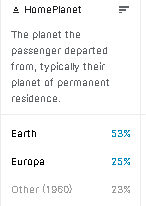

In [115]:
#se muestran que valores contiene la columna 'HomePlanet'
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [116]:
#Llenamos los valores faltantes con un valor tipo 'str' para poder verificar cuantos valores faltantes hay
df['HomePlanet'] = df['HomePlanet'].fillna('Valor_faltante')

In [117]:
#mostramos los diferentes variables dentro de la columna, con sus respectivos contadores de repetición
unique,counts =np.unique(df['HomePlanet'],return_counts = True)
dict(zip(unique,counts))

{'Earth': 4602, 'Europa': 2131, 'Mars': 1759, 'Valor_faltante': 201}

Por lo que no encontramos una forma correcta de tratar los datos faltantes para no modificar la realidad de gran forma, elegimos eliminar los datos faltantes

In [118]:
#Buscamos las filas que necesitamos eliminar ya que contienen la cadena 'Valor_faltante'

buscador_valor_faltante = df[df['HomePlanet'] == 'Valor_faltante'].index

#eliminamos las filas según los índices

df = df.drop(buscador_valor_faltante)


Código para eliminar las filas con un valor determinado inspirado de: https://www.delftstack.com/es/howto/python-pandas/drop-row-pandas/#:~:text=drop(),-Python&text=Se%20eliminan%20las%20filas%20con,utilizar%20el%20%C3%ADndice%20por%20defecto

In [119]:
#Verificamos si no existe perdida de datos
unique,counts =np.unique(df['HomePlanet'],return_counts = True)
dict(zip(unique,counts))

{'Earth': 4602, 'Europa': 2131, 'Mars': 1759}

In [120]:
#Reemplazamos los datos a variables categóricas

df['HomePlanet'] = df['HomePlanet'].replace('Earth',1)
df['HomePlanet'] = df['HomePlanet'].replace('Mars',0)
df['HomePlanet'] = df['HomePlanet'].replace('Europa',2)

In [121]:
#verificamos los cambios y que solo estén las variables categóricas en todo la columna
df['HomePlanet'].unique()

array([2, 1, 0])

In [122]:
#finalmente reseteamos los índices para evitar problemas a futuro con la limpieza de datos
df.reset_index(inplace=True, drop=False)

## Limpuieza de columna Cabin

En este caso, eliminamos la columna completa ya que esta columna presenta datos de la misma naturaleza que 'Passenger_ID'

In [123]:
df = df.drop(columns= 'Cabin')

In [124]:
#verificamos los cambios
df.head(1)

,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,2,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


## Limpieza de columna 'Age'
En este caso, calcularemos el promedio de la columna 'Age' e imputaremos los valores faltantes con el promedio.

In [125]:
#realizamos una suma acumulada de todos los valores en la columna 'Age'
numerador_prom = df['Age'].sum()
numerador_prom

239711.0

In [126]:
#para encontrar el denominador, miraremos cuantas filas tiene el df sin valores faltantes en la columna 'Age'

#asignamos una nueva df para verificar cuantas filas contiene la columna 'Age' sin valores faltantes

df_age = df

#eliminaremos los datos faltantes 

df_age = df_age.dropna(subset=['Age'])
#encontraremos cuantas filas tiene el df_age 

df_age.shape

(8315, 14)

In [127]:
#automatizamos la obtención del denominador
denominador_prom = list(df_age.shape)
denominador_prom = denominador_prom[0]
denominador_prom

8315

In [128]:
#obtenemos el valor de la edad promedio
edad_promedio = numerador_prom/denominador_prom
round(edad_promedio)

29

In [129]:
#imputamos los valores en la df
df['Age'] = df['Age'].fillna(edad_promedio)

Código para rellenar los datos faltantes inspirado de: https://programmerclick.com/article/35261195531/

## Limpieza columna VIP
En este caso imputaremos los valores con False ya que la gran mayoría de datos presenta que son 'False'

In [130]:
#cambiaremos los valores a tipo string ya que hay valores booleanos 
df['VIP']= df['VIP'].astype(str)

Código para convertir todos los datos de la columna en tipo 'String' inspirado de: 
https://www.delftstack.com/es/howto/python-pandas/pandas-convert-column-values-to-string/#:~:text=Si%20queremos%20cambiar%20el%20tipo,utilizar%20el%20m%C3%A9todo%20applymap()%20.&text=Convierte%20el%20tipo%20de%20datos,por%20object%20en%20la%20salida

In [131]:
#verificamos que la mayoria de los valores son falsos 
a,b =np.unique(df['VIP'],return_counts = True)
dict(zip(a,b))

{'False': 8098, 'True': 194, 'nan': 200}

Como podemos observar es una buena estrategia imputar las filas con datos faltantes con el valor de 'False' ya que constituyen más del 97% 

In [132]:
#cambiamos los valores de 'nan' a 'False'
for i in range (len(list(df['VIP']))):
  if df['VIP'][i] == 'nan' :
    df['VIP'][i] = 'False'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [133]:
#convertimos en variables categóricas las variables en la columna 'VIP'

#Reemplazar los valores a 0s y 1s
df['VIP'] = df['VIP'].replace('True',1)
df['VIP'] = df['VIP'].replace('False',0)

In [134]:
#Verficamos los cambios 

df.head(3)

,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,2,False,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,1,False,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,2,False,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


## Limpieza columnas 'RoomService' , 'FoodCourt' , 'ShppingMall' y otras.

En este caso miraremos que columnas contienen una correlación positiva con nuestro vector objetivo "Transported"




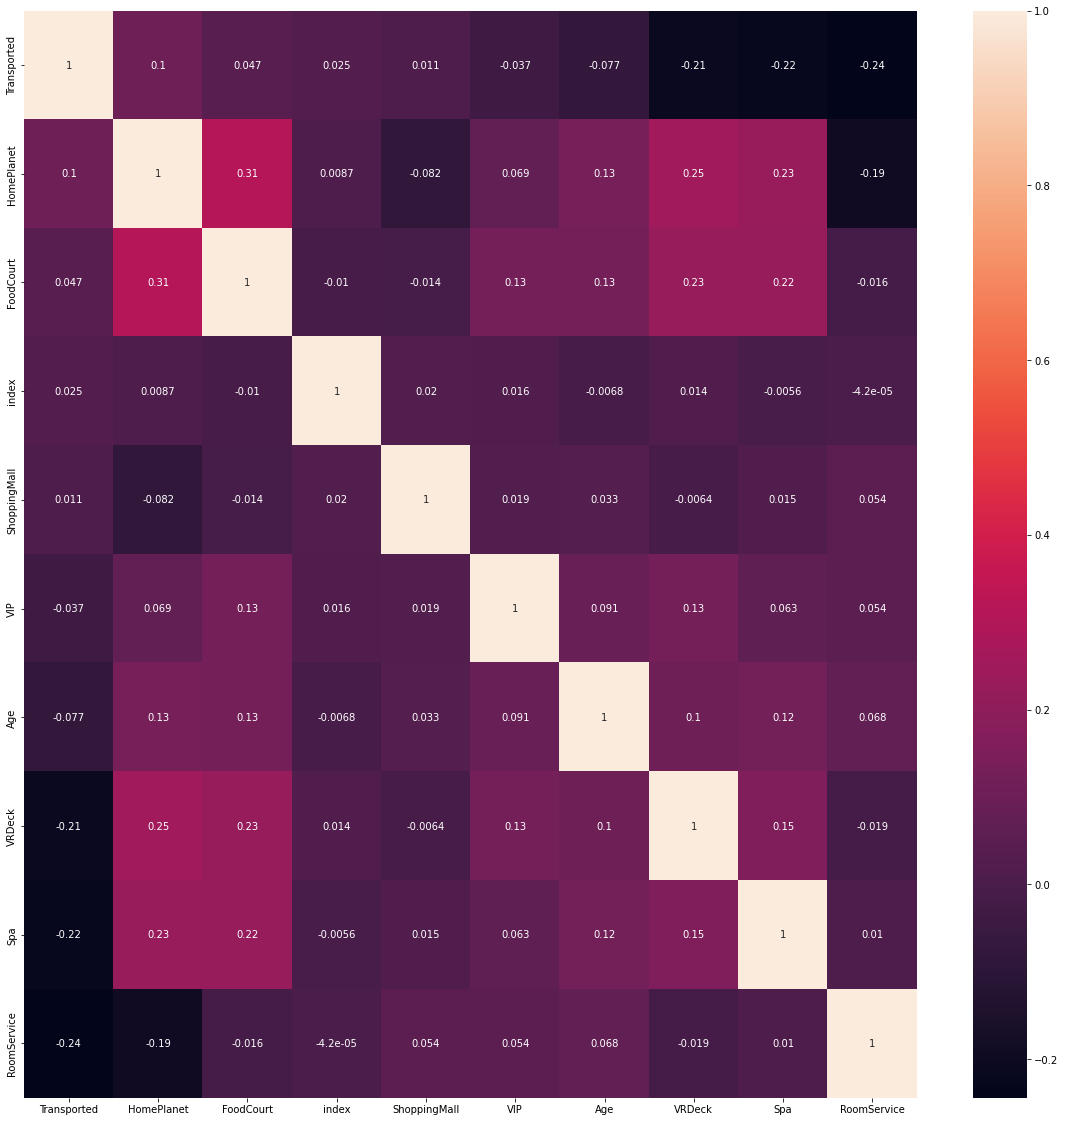

In [135]:
#matriz de correlación
corr = df.corr()
corr_cols = corr['Transported'].sort_values(ascending = False).head(10).index
corr_Transported = df[corr_cols].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corr_Transported, annot = True)

Como no tienen una alta correlación negativa se mantienen las variables y eliminamos las filas con datos faltantes de diferentes columnas 

In [136]:
#asignamos una lista con los nombres de las columnas que eliminaremos 

lista_columns_drop = ['CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#Eliminamos datos faltantes columna 'CryoSleep'
df = df.dropna(subset=lista_columns_drop)

In [137]:
#verificamos si se eliminaron completamente los datos faltantes
df.isnull().sum()

index             0
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     156
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            166
Transported       0
dtype: int64

##Limpieza columna destination

En este caso aplicaremos un proceso similar al de la columna 'HomePlanet' que se realizó previamente

In [138]:
#Llenamos los valores faltantes con un valor tipo str para poder verificar cuantos valores faltantes hay
df['Destination'] = df['Destination'].fillna('Valor_faltante')

In [139]:
#Verificamos que y cuantos tipos de valores hay en la columna 'Destination'
a,b =np.unique(df['Destination'],return_counts = True)
dict(zip(a,b))

{'55 Cancri e': 1547,
 'PSO J318.5-22': 686,
 'TRAPPIST-1e': 5022,
 'Valor_faltante': 156}

In [140]:
#Buscamos las filas que necesitamos eliminar ya que contienen la cadena 'Valor_faltante'

buscador_valor_faltante_2 = df[df['Destination'] == 'Valor_faltante'].index

#eliminamos las filas según los índices

df = df.drop(buscador_valor_faltante_2)


In [141]:
#Reemplazamos los datos a variables categóricas

df['Destination'] = df['Destination'].replace('55 Cancri e',1)
df['Destination'] = df['Destination'].replace('PSO J318.5-22',0)
df['Destination'] = df['Destination'].replace('TRAPPIST-1e',2)


In [142]:
#verificamos los cambios 
df['Destination'].unique()

array([2, 0, 1])

In [143]:
#reseteamos los índices
df.reset_index(inplace=True, drop=False)

## Convertir a variables dummies los datos en la columna 'CryOsleep'

In [145]:
df.head(1) #los datos están entre 'True' y 'False'

,level_0,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0,0001_01,2,False,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [146]:
#Reemplazar los valores a 0s y 1s en la columna 'CryoSleep'
df['CryoSleep'] = df['CryoSleep'].replace(True,1)
df['CryoSleep'] = df['CryoSleep'].replace(False,0)

In [147]:
df.head()

,level_0,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0,0001_01,2,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,1,0002_01,1,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,2,0003_01,2,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,3,0003_02,2,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,4,0004_01,1,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Convertir a variables dummies la columna vector objetivo 'Transported'

Este proceso se realiza para que sea más interpretable para el modelo de predicción 

In [148]:
#Reemplazar los valores a 0s y 1s en la columna 'Transported'
df['Transported'] = df['Transported'].replace(True,1)
df['Transported'] = df['Transported'].replace(False,0)

In [151]:
df.head() #verificamos los cambios

,level_0,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0,0001_01,2,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,1,1,0002_01,1,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,2,2,0003_01,2,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,3,3,0003_02,2,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,4,4,0004_01,1,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [154]:
# finalmente verificamos que tipo de datos contiene la columna 'Transported'
type(df['Transported'][1])

numpy.int64

# Implementación modelo de predicción 

Importamos la csv de prueba ya aplicada la limpieza de datos que en la df de train 

Proceso de obtención de df de prueba aplicada los mismos cambios que la df_train:

https://colab.research.google.com/drive/1KqHqdtkLBfHglwhv8I381yBSWJFd8qFc#scrollTo=vkn-ouoiUSm8

Montamos el conjunto de prueba y verificamos si es el correcto

In [157]:
nombrearchivo_prueba = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 3/Deberes /Week 2 - Track 3/spaceship-titanic.zip (Unzipped Files)/Df_prueba_convertir/df_prueba.csv'
df_prueba = pd.read_csv(nombrearchivo_prueba)
df_prueba.head()

,Unnamed: 0,level_0,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,0,0,0013_01,1,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,1,1,1,0018_01,1,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,2,2,2,0019_01,2,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,3,3,3,0021_01,2,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,4,4,4,0023_01,1,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [158]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4277 non-null   int64  
 1   level_0       4277 non-null   int64  
 2   index         4277 non-null   int64  
 3   PassengerId   4277 non-null   object 
 4   HomePlanet    4277 non-null   int64  
 5   CryoSleep     4277 non-null   int64  
 6   Destination   4277 non-null   int64  
 7   Age           4277 non-null   float64
 8   VIP           4277 non-null   int64  
 9   RoomService   4277 non-null   float64
 10  FoodCourt     4277 non-null   float64
 11  ShoppingMall  4277 non-null   float64
 12  Spa           4277 non-null   float64
 13  VRDeck        4277 non-null   float64
 14  Name          4183 non-null   object 
dtypes: float64(6), int64(7), object(2)
memory usage: 501.3+ KB


In [159]:
df_prueba.isnull().sum()

Unnamed: 0       0
level_0          0
index            0
PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

## Dvision de conjuntos de prueba y entrenamiento 

In [160]:
#df con la que trabajaremos para obtener los datos de 'X_train' y 'y_train' 
df.head(1)

,level_0,index,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0,0001_01,2,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0


### X_train

In [161]:
#creamos un df llamado 'X_train' con las columnas que serán entrenadas para el modelo
X_train = df.loc[:,['HomePlanet','CryoSleep','Destination','Age',
                 'VIP','RoomService','FoodCourt','ShoppingMall',
                 'Spa','VRDeck']]

In [162]:
X_train.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0


In [163]:
X_train.shape

(7255, 10)

### y_train

In [164]:
y_train = df['Transported']

In [165]:
y_train.shape

(7255,)

## Entrenamiento y prueba del modelo 

In [166]:
#Importamos librerías que necesitamos para el modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
#Entrenamos el modelo
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

## X_test y y_test 

Se obtienen la df de prueba 'X_test' y 'y_test' a partir de la df_prueba importada

### X_test 

In [173]:
X_test = df_prueba.loc[:,['HomePlanet','CryoSleep','Destination','Age',
                 'VIP','RoomService','FoodCourt','ShoppingMall',
                 'Spa','VRDeck']]

In [174]:
X_test.shape

(4277, 10)

In [175]:
X_test.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0


### y_test

In [178]:
y_test = gbc.predict(X_test) #realizamos predicciones que serán nuestras predicciones generadas a partir del conjunto de prueba

Puntuamos el modelo a partir de nuestra base de entrenamiento para conocer si tenemos un modelo bueno

In [180]:
gbc.score(X_train,y_train)

0.8144727773949001

#Guardamos en forma de df para presentarlo a kaggle

In [181]:
to_submit = pd.DataFrame({'PassengerId':df_prueba['PassengerId'],'Transported':y_test})

In [182]:
to_submit.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


Volvemos a cambiar los valores de nuestro vector objetivo a 'True' y 'False'

In [183]:
to_submit['Transported'] = to_submit['Transported'].replace(1,'True')
to_submit['Transported'] = to_submit['Transported'].replace(0,'False')

In [184]:
to_submit.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


### Convertimos a csv para subirlo a Kaggle

In [185]:
to_submit.to_csv('/content/drive/MyDrive/Coding Dojo/Códigos/Track 3/Deberes /Week 2 - Track 3/spaceship-titanic.zip (Unzipped Files)/kaggle.csv',index = False)